# D214 - Data Analytics Graduate Capstone
### NKM2 Task 2: Data Analytics Report and Executive Summary
#### Data Analytics Graduate Capstone — D214
#### PRFA - NKM2
> André Davis
> StudentID: 010630641
> MSDA
>
> Competencies
> 981.1.1 : Capstone
> The graduate integrates and synthesizes competencies from across the degree program and thereby demonstrates the ability to participate in and contribute value to the chosen professional field.

##### Table of Contents

<ul>
    <li><a href="#research-question">A: Research Question</a></li>
    <li><a href="#data-collection">B: Data Collection</a></li>
    <li><a href="#data-extraction-and-preparation">C: Data Extraction and Preparation</a></li>
    <li><a href="#analysis">D: Analysis</a></li>
    <li><a href="#data-summary-and-implications">E: Data Summary and Implications</a></li>
    <li><a href="#sources">F: Sources</a></li>
</ul>

<a id="research-question"></a>
# A: Research Question
>Summarize the original real-data research question you identified in task 1. Your summary should include justification for the research question you identified in task 1, a description of the context in which the research question exists, and a discussion of your hypothesis.

#### Research Question:
Is it possible to develop a machine learning model that can accurately classify new content as SPAM or non-SPAM (HAM), using a dataset comprising known SPAM and regular content from the 2007 TREC Public Spam Corpus and Enron emails? 


#### Justification:
Spam presents a significant challenge for both businesses and households. It not only consumes valuable storage space and impedes the identification of critical emails, but it also poses a substantial security risk. Spam emails can serve as conduits for malicious threats such as viruses, worms, phishing scams, and ransomware. Therefore, implementing models capable of accurately detecting spam is essential. These models are not only crucial for enhancing security measures but also for ensuring that email server storage is reserved exclusively for important organizational communications.


#### Hypothesis:

**Null hypothesis (*HΦ*)**- The machine learning model developed using the 2007 TREC Public Spam Corpus and Enron emails dataset cannot accurately classify new content as SPAM or non-SPAM (HAM) with an accuracy score of 95% or higher. This implies that any observed accuracy in classification does not significantly exceed what would be expected by chance. 

**Alternate Hypothesis (*Ha*)**- The machine learning model developed using the 2007 TREC Public Spam Corpus and Enron emails dataset can accurately classify new content as SPAM or non-SPAM (HAM) with an accuracy score of 95% or higher. This suggests that the model has learned effective patterns within the dataset, enabling it to differentiate between SPAM and non-SPAM content significantly better than chance.

<a id="data-collection"></a>
# B: Data Collection
>Report on your data-collection process by describing the relevant data you collected, discussing one advantage and one disadvantage of the data-gathering methodology you used, and discussing how you overcame any challenges you encountered during the process of collecting your data.

##### Data Collected

The dataset under discussion, titled *'Spam Email Classification Dataset'*, encompasses a meticulously curated collection of email content. Each email within this dataset has been accurately categorized as either 'SPAM' or 'NOT SPAM' (often referred to as 'HAM'). This valuable compilation of data was sourced from the well-known platform, [kaggle.com](https://www.kaggle.com/).

The composition of the dataset is diverse, integrating data from two prominent sources: the Enron Corpus and the TREC Public Spam Corpus. This blend ensures a rich variety of email samples. One of the key features of this dataset is its pre-labeled nature. The emails, which exhibit a range of unstructured content, have been pre-classified, rendering the dataset immediately applicable for training machine learning models in spam detection and email filtering tasks. Such ready-to-use, pre-labeled datasets are instrumental in facilitating efficient model training and accurate spam classification.

Dataset Description:

| Feature        | Datatype      | Description                                                                                                                                                                                          |
|----------------|---------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| label          | Qualitative   | This is the feature that is the label of the dataset. It is a Boolean represented as 1 or 0<br/>1 represents the associated text is SPAM<br/>0 represents the associated text is HAM (Not SPAM)      |
| text           | Qualitative   | This is just text content (unstructured data). In the case of this dataset the contents are an Email. This is the data that will be used to train and is pre-labeled for the Machine Learning model. |

### Data Collection Advantage
Utilizing a data repository such as [kaggle.com](https://www.kaggle.com/) offers the distinct advantage of having the data collection process already completed from the original source(s). In the majority of instances, the nature of the data is comprehensively described, its usability is assessed through scoring, and any instances of missing data are diligently documented.

### Data Collection Disadvantage

One drawback associated with this approach is that achieving a comprehensive verification of all the sources used in creating the dataset necessitates visiting the listed original sources and meticulously conducting a thorough comparison between the original data and the content contained within the Kaggle dataset.

### Challenges and Overcoming Them

This particular challenge is not related to the collection per se but rather the storage of the data collected and its storage in GitHub as my WGU work has been stored there. 

>GitHub blocks files larger than 100 MiB.
> Source: [GitHub Large Files](https://docs.github.com/en/repositories/working-with-files/managing-large-files/about-large-files-on-github)

The 'Spam Email Classification Dataset' consists of approximately 84,000 rows, with a file size ranging between 133MB and 144MB. To incorporate this dataset into my GitHub repository for the Capstone Project, I divided it into two separate files. While this approach facilitated the dataset's inclusion in my repository, it introduced an additional step in the coding process. Specifically, I will need to perform two separate file reads and subsequently merge the datasets back into the original one.



<a id="data-extraction-and-preparation"></a>
# C: Data Extraction and Preparation
>Describe your data-extraction and preparation process and provide screenshots to illustrate each step. Explain the tools and techniques you used for data extraction and data preparation, including how these tools and techniques were used on the data. Justify why you used these particular tools and techniques, including one advantage and one disadvantage when they are used with your data-extraction and -preparation methods. 

#### NOTE To Evaluator: 

Because this is an interactive Jupyter Notebook the description will be in Markdown and instead of screenshots inline code and charts will be used.

---

Before commencing the data extraction, it is necessary to reassemble the dataset, which was previously segmented to comply with [GitHub's file size limitation of 100MB](https://docs.github.com/en/repositories/working-with-files/managing-large-files/about-large-files-on-github) for check-ins. Once this re-merging is completed, we can proceed with the performance evaluation phase of the data extraction process.

The data extraction process involves working with a pre-labeled dataset, specifically the "Spam Email Classification Dataset" available on [Kaggle.com](https://www.kaggle.com/datasets/purusinghvi/email-spam-classification-dataset?rvi=1). The initial phase of this process includes verifying the dataset's integrity by confirming the total number of records (83,446) and ensuring the absence of missing values. Additionally, the distribution of labels within the dataset will be examined both visually, through histograms, and analytically, with the results being graphically presented for easy interpretation. Following this, the dataset's 'EmailContent', which comprises unstructured text, requires pre-processing and vectorization. This step is critical as Logistic Regression, the chosen model for this task, cannot operate directly on raw text data.

The tools and techniques used during the data extraction and preparation process are as follows:
* [Python](https://www.python.org/)
   *  Python is renowned for its user-friendly nature, making it an ideal choice for scientists who may not have a programming background. This accessibility represents Python's significant advantage in fostering a diverse user community. However, it is important to acknowledge that the very features contributing to Python's ease of use can also result in slower run-time performance. This dichotomy highlights the need for balancing user-friendliness with efficiency in computational tasks.
      * **Advantage:** Easy to Use
      * **Disadvantage:** [Slow Run-Time](https://bodyvisionmedical.com/articles/why-is-python-so-slow-tackling-pythons-performance-issues)  
* [Polars](https://www.pola.rs/) 
   * [Polars](https://www.pola.rs/) is a data manipulation library akin to [Pandas](https://pandas.pydata.org/), renowned for its efficiency with small to medium-sized datasets. However, Polars distinguishes itself by being developed in Rust, a language that combines Python's simplicity with the high performance of C. This project will employ Polars not only as a practical example of its application but also to address the common occurrence of large datasets in real-life scenarios.
      * **Advantage:** Operates on larger datasets faster than Pandas as it's underlying implementation of [Rust Programming Langauge](https://www.rust-lang.org/).
      * **Disadvantage:** Being newer than Panda the ecosystem and community support is much smaller. 
* [Matplotlib](https://matplotlib.org/)
   * This is a community standard visualization library and performed well for all other performance assessments. Although, it has heavy integration with [Pandas](https://pandas.pydata.org/), it is not a requirement to use the visualization library. In terms of the data collection and preparation process this is used to help check whether the labeled dataset is balanced or imbalanced visually.
      * **Advantage:** Extensive and highly customizable plotting library. Can do a spanse of plotting such as scatter plots, line graphs, bar charts, histograms, 3D plots just to name a few.
      * **Disadvantage:** Very steep learning curve. I was constantly deep in the documentation for sometimes what would seem like basic operations.
* [Seaborn](https://seaborn.pydata.org/)
   *  This is a statistical data visualization library. It is built on top of matplotlib. It provides high-level interfaces
      * **Advantage:** The high-level interfaces make some Matplotlib plotting easier. For example heatmaps are pretty complex in Matplotlib this simplifies getting a heatmap generated.
      * **Disadvantage:**  Because it moves things to a higher-level of interfaces some of the customization aspects of Matplotlib are reduced or lost.
* [NLTK (Natural Language Toolkit)](https://www.nltk.org/)
   * This toolkit is widely recognized for its effectiveness in natural language processing. In the context of data collection and preparation, it will be utilized to eliminate stopwords during vectorization and to segment the text into smaller, manageable units for further analysis.
      * **Advantage:** Very easy to use for language processing
      * **Disadvantage:** The toolkit exhibits reduced performance efficiency when handling larger datasets, leading to slower processing speeds. Consequently, its suitability for production environments is limited, rendering it more appropriate as a resource for educational and prototype development purposes rather than for high-scale, commercial applications.
* [Emoji](https://github.com/carpedm20/emoji/)
   * During the pre-processing process before the model is created this library makes it easier to identify non-standard characters that come in the form of emojis and will aid in removing them before modeling.
      * **Advantage:** Works great at removing emoji related material from text.
      * **Disadvantage:**  Doesn't really do anything else, so it's only an add-in to other frameworks.
* [Unidecode](https://pypi.org/project/Unidecode/)
   * During the pre-processing process before the model is created, this helps remove Unicode ASCII type characters that may be introduced and cause issues. These will be removed.
      * **Advantage:** Great at converting non-ASCII characters equivalent to add in removal or pre-processing.
      * **Disadvantage:** Only operations ASCII meaning other languages can lose meaning if used on non-english. 
* [Scikit-Learn TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)
   * To facilitate the logistic regression analysis, it is essential to convert the unstructured text, categorized as either 'SPAM' or 'Not SPAM (HAM)', into a numerical format suitable for modeling. For this purpose, the `TfidfVectorizer` will be employed. This tool will not only execute a custom preprocessing function but also transform the text into numerical embeddings, thereby enabling effective model execution on the dataset.
      * Custom Preprocessing function `preprocess_and_tokenize` steps include:
           * Convert all text to lowercase
           * Remove Unicode text
           * Remove emojis
           * Remove punctuation
           * Tokenize unstructured text
           * Remove stop words that end vectorization
   <br /> <br />             
      * **Advantage:** Proficient in transforming raw documents, which are typically unstructured text, into structured, feature-based representations suitable for analysis.
      * **Disadvantage:** Due to its emphasis on term frequency, there is a potential loss of the contextual significance behind word tokens in the process.
 


In [27]:
import math

'''
Python Library Imports
'''
import warnings
warnings.filterwarnings('ignore')

import re, pprint, math
from typing import List

#Data Manipulation
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Data Extraction and Preprocessing
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import emoji
from unidecode import unidecode
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

#Logisitcal Regression Modeling and Model Evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (mean_squared_error
                            ,accuracy_score
                            ,classification_report
                            ,confusion_matrix
                            ,roc_curve
                            ,roc_auc_score)
from statsmodels.api import Logit, add_constant


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cubic\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cubic\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Loading the labeled SPAM data

As outlined in Section B, we will be importing a dataset that has been divided into two separate files. This division was necessary to comply with GitHub's file size limitation of 100 MB.

1. Load files
   * '0-enron-emails-labeled.csv'
   * '1-enron-emails-labeled.csv'
2. Merge files back into original dataset, expect 83448 rows of data
3. Rename columns to IsSpam and EmailContent for readability

In [28]:
def check_expected_row(data: pl.DataFrame) -> None:
    """   
    :param data: Polars Dataframe to check the projects row count 
    :type data: pl.DataFrame
     
    :return: None
    """
    expected_rows = 83448
    assert expected_rows == data.height, f'Expected data to contain {expected_rows} rows.'

In [29]:
top_data = pl.read_csv('./0-enron-emails-labeled.csv')
bottom_data = pl.read_csv('./1-enron-emails-labeled.csv')

merged = pl.concat([top_data, bottom_data]).drop('index')

assert merged.is_empty() == False, f'The merged Polars dataframe should not be empty.'

check_expected_row(merged)

renamed = {
     'label': 'IsSpam'
    ,'text': 'EmailContent' 
}

labeled_emails = merged.rename(mapping=renamed)

labeled_emails

IsSpam,EmailContent
i64,str
1,"""hello , how ar…"
0,"""maybe you're l…"
0,""" begin pgp sig…"
0,""" why filename …"
1,"""lynnette just …"
1,"""companion shor…"
0,"""you have recei…"
1,"""hello , we se…"
1,"""dear valued me…"


#### Check for empty values 

The dataset *'Spam Email Classification Dataset'* from [Kaggle](https://www.kaggle.com/) stated there are NO missing values. This is a verification step.

In [30]:
def missing_values_check(data: pl.DataFrame) -> None:
    """
    :param data: Dataframe to check for missing values per column
    :type data: pl.DataFrame
     
    :return: None
    """
    
    missing_values = data.null_count()
    for column in missing_values.columns:
        print(f'Checking [{column}] for missing values...')
        missing_count = missing_values[column][0]
        assert missing_count == 0, f'{column} feature should have zero missing values but found {missing_count}'
        print(f'[{column}] has no missing values.')

In [31]:
missing_values_check(labeled_emails)

Checking [IsSpam] for missing values...
[IsSpam] has no missing values.
Checking [EmailContent] for missing values...
[EmailContent] has no missing values.


In [32]:
'''
Describe the Data
'''
labeled_emails.describe()

describe,IsSpam,EmailContent
str,f64,str
"""count""",83448.0,"""83448"""
"""null_count""",0.0,"""0"""
"""mean""",0.526196,null
"""std""",0.499316,null
"""min""",0.0,""" & who wants …"
"""25%""",0.0,null
"""50%""",1.0,null
"""75%""",1.0,null
"""max""",1.0,"""李俊杰 wrote dear…"


### Data Balance Check

Verifying Visually and Mathematically that the data is balanced for the Logistical Regression Model.

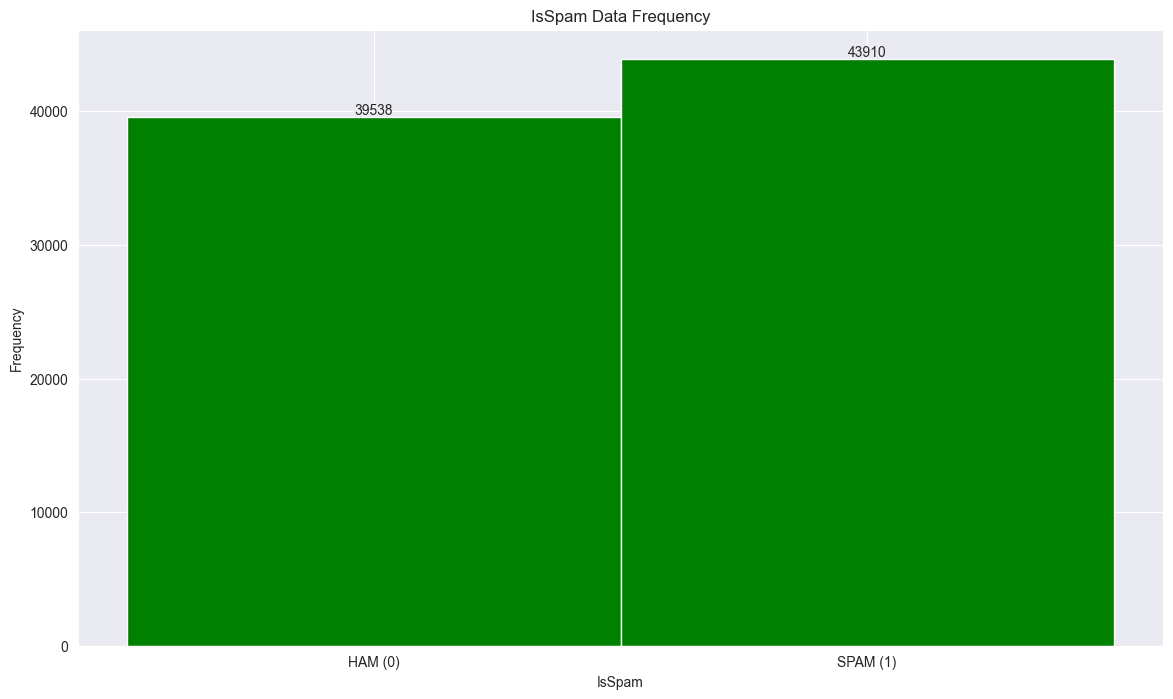

In [33]:
'''
Generate a Histogram Chart to visual display HAM(0) vs SPAM(1) balance
'''
is_spam_label = ['HAM (0)', 'SPAM (1)']

hist_data = labeled_emails['IsSpam'].hist(bins=(0,1))
bins = hist_data['break_point'].to_numpy()[:-1].astype(int)
counts = hist_data['IsSpam_count'].to_numpy()[:-1].astype(int)

plt.figure(figsize=(14,8))

#values to place inside bar
for index, value in enumerate(counts):
    plt.text(bins[index], value, str(value), ha='center', va='bottom')

plt.bar(bins, counts, width=1, color='green')
plt.xlabel('IsSpam')
plt.xticks(ticks=bins, labels=is_spam_label)
plt.ylabel('Frequency')
plt.title('IsSpam Data Frequency')
plt.show()

In [34]:
'''
Calculate percentage of HAM(0) vs SPAM(1) to pair with visual balance check.
'''
total_results = (counts[0] + counts[1])
ham_percentage = counts[0] / total_results
spam_percentage = counts[1] / total_results

ham_percentage_formatted = "{:.2f}".format(ham_percentage * 100)
spam_percentage_formatted = "{:.2f}".format(spam_percentage * 100)

balance_results = f'''
Percentages:
------------
 HAM(0): {ham_percentage_formatted}%
SPAM(1): {spam_percentage_formatted}%
'''
print(balance_results)


Percentages:
------------
 HAM(0): 47.38%
SPAM(1): 52.62%


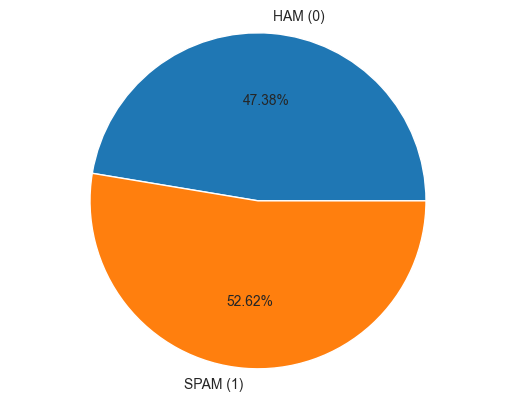

In [35]:
'''
Visualization of the calculated percentages of IsSpam.
'''
plt.pie([ham_percentage, spam_percentage], labels=is_spam_label, autopct='%.2f%%')
plt.axis('equal')
plt.show()

### Pre-Processing EmailContent (text) for Vectorization/Embedding

In this phase, we will undertake the professional preprocessing of `EmailContent`, which inherently possesses an unstructured format due to its origin as email text. The process will involve the meticulous removal of special characters and stop words. This refinement is essential to enable the model to concentrate more effectively on the critical components of the email text content.

In [36]:
def preprocess_and_tokenize(text:str) -> List[str]:
    """
    :param text: Content that needs to be cleaned before vectorization/embeddings
    :type text: str
     
    :return: Cleaned Content Tokenized
    """
    
    text = text.lower()
    text = unidecode(text) #normalization. Dealing with things like accents
    text = emoji.demojize(text) #fix emojis
    text = re.sub(r'[^\w\s]', '', text) #remove punctuations
    
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    
    filtered = list()
    for word in tokens:
        if word not in stop_words:
            filtered.append(word)
    
    return filtered


In [54]:
'''
Split into training and testing data
'''
#Independent
email_contents = labeled_emails['EmailContent'].to_numpy()

#Dependent
email_labels = labeled_emails['IsSpam'].to_numpy()

X_train_emails, X_test_emails, y_train_labels, y_test_labels = train_test_split(email_contents, email_labels, test_size=.2, random_state=999)

In [38]:
'''
Vectorization (Embeddings) for Logistical Regression Modeling
'''
vectorizer  = TfidfVectorizer(tokenizer=preprocess_and_tokenize, lowercase=True)

fitted_vectorizer = vectorizer.fit(X_train_emails)

X_train_emails_embeddings = fitted_vectorizer.transform(X_train_emails)
X_test_emails_embeddings = fitted_vectorizer.transform(X_test_emails)

<a id="analysis"></a>
# D: Analysis
>  Report on your data-analysis process by describing the analysis technique(s) you used to appropriately analyze the data. Include the calculations you performed and their outputs. Justify how you selected the analysis technique(s) you used, including one advantage and one disadvantage of these technique(s).

## SPAM Detection Analysis with Logistical Regression

The data collection and exploratory data analysis (EDA) phases have been successfully completed, paving the way for the implementation of the Logistic Regression Model. The subsequent step involves evaluating the model's effectiveness in detecting spam.

Throughout the data collection phase, a crucial transformation was undertaken: converting the textual content of the emails (`EmailContent`) into vector format (embeddings). This conversion is essential for the logistic regression model, as it cannot process plain text data. As we enter the modeling phase, our dataset, comprising of the binary `IsSpam` (1 for spam, 0 for non-spam) and `EmailContent` (now in vector format), has been segregated into training and testing subsets. This segregation is vital for both the training of the model and the evaluation of its performance.

### Reasons for chosen Logistical Regression Model

Logistic Regression was selected as the method of choice for the Spam Detection Model due to several compelling reasons. Firstly, its inherent design for binary classification aligns perfectly with the "Is or Is Not" framework of our task, making it an ideal tool for distinguishing spam from non-spam emails. This model's primary function aligns precisely with our requirements.

Secondly, Logistic Regression offers the advantage of providing probabilistic outcomes. These probabilities lend a degree of nuance to the classification process, allowing for a more detailed understanding of the likelihood that a given email falls into the spam category.

Thirdly, this model stands out for its efficiency paired with simplicity, delivering reliable results without the complexity of more advanced models. This efficiency is particularly beneficial for quickly establishing a functional spam detection system, potentially serving as a foundation while exploring more sophisticated solutions, such as Neural Network-based machine learning models.

Finally, Logistic Regression is commendable for its robustness against over-fitting and its scalability. It maintains its performance integrity even as the dataset expands, making it a sustainable choice for evolving spam detection needs. These qualities, combined with its ability to handle increasing volumes of data effectively, underscore its suitability for our spam detection model.

### Advantages and Disadvantages of Logistic Regression Model
***Advantage:***
Logistic Regression is renowned for its simplicity and ease of implementation, making it a highly accessible and straightforward option. This feature positions it as an optimal starting point for binary classification tasks, such as our 'Spam Email Classification Dataset'. Its user-friendly nature does not compromise its effectiveness, offering a reliable solution for initial classification challenges.

***Disadvantage:***
However, this model exhibits sensitivity to certain data characteristics. Imbalances in the labeled data can lead to biased outcomes, while outliers can disproportionately affect its performance. Such issues necessitate careful data preprocessing and balancing to ensure the integrity and reliability of the model’s predictions. In scenarios where data imbalances or outliers are prevalent, Logistic Regression may require additional attention to mitigate these influences.

#### Fitting the Model
The initial step involved fitting the model with the training segment of our dataset. Here, *y* represents our labels (`IsSpam`), while *X* denotes our `EmailContent`, transformed into vectorized form as embeddings. This process is fundamental in preparing the model for effective spam detection.

#### Evaluating Model Accuracy
Following the model fitting, we employed the [`.score()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.score) method to ascertain the accuracy of the model. The computed accuracy score stood at `0.9895593037538573`, indicating a remarkable 99% accuracy rate and a mere 1% inaccuracy. Despite this high level of accuracy, our evaluation extends beyond this metric to thoroughly assess the model's overall effectiveness in spam detection. This comprehensive analysis is crucial to ensure that the model is not only accurate but also reliable and robust in diverse scenarios.

* ***Advantage:*** This score is a quick and easy way to get an initial assessment of overall model performance without writing additional code to perform custom metrics for evaluation.
* ***Disadvantage:*** Like of insight or customization to get in-depth insights into models ability to accurately predict.

### Evaluating Model Prediction Accuracy 
##### (Accuracy Classification Score)

Next, we will proceed to evaluate the model's predictive capabilities, specifically its proficiency in accurately classifying email content as either SPAM or Not SPAM (HAM). The initial step involves utilizing the [`.predict()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict) function of the fitted model. This function will generate prediction labels (SPAM(1)/HAM(0)) based on the test dataset's `EmailContent` embeddings.

Following this, we will apply Scikit-Learn's metrics package, particularly the [`accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) function. This function facilitates a comparison between the predicted labels obtained from `.predict()` and the actual labels from the test dataset, thereby yielding an accuracy score. For our current fitted model, this score was calculated to be `0.9826842420611145`, which translates to a 98% accuracy and a 2% inaccuracy ratio. This step is crucial for a comprehensive understanding of the model's performance in real-world scenarios.

* ***Advantage:***
  * `.predict()` - Directly gain predictions based on your classes, i.e *SPAM/HAM*
  * `accuracy_score()` - Easy to understand metric with regards to classification prediction.
* ***Disadvantage:*** 
  * `.predict()` - Does not give insight into model flaws.
  * `accuracy_score()` - Is very sensitive to unbalanced datasets.

### ROC AUC Score Performance Assessment
##### (Receiver Operator Characteristics & Area Under the Curve)

Utilizing the [`roc_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) and [`roc_auc_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) functions from the Scikit-Learn metrics package, we will conduct a thorough evaluation of our fitted model's capability to accurately differentiate between the two classes, SPAM (1) and HAM (0), using the `EmailContent` Embedding as input. The process begins with the application of the `roc_curve` function, which involves the comparison of the y_labels from the test dataset against the predicted y_labels. This comparison yields the false positive and true positive rates, which can be graphically represented to visually assess the model's classification performance.

Subsequently, the `roc_auc_score` function is employed to quantitatively measure the model's predictive accuracy. This measurement categorizes the model's performance into one of four distinct levels: always predicting the opposite class, performing no better than random guessing, outperforming random guessing, and achieving perfect classification predictions. In our case, the AUC score was recorded as `0.9821508589186757` (98.22%), indicating a performance level that significantly surpasses random guessing but falls just short of perfect prediction in distinguishing between the SPAM and HAM classes. This high AUC score is indicative of the model's strong discriminative ability in this specific context.

* ***Advantage:***
  * `roc_curve()` \ `roc_auc_score()` - great for visually comparing performance of multiple models.
* ***Disadvantage:***
  * `roc_curve()` \ * `roc_auc_score()` - Limited to binary classifications

### Predictions Classification Report

To get a bit more into the details of evaluating the model we'll use the
[`classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) function. This will provide us details in a few categories such as precision, recall, f1-score, support and some averages.

1. **Precision:** the ratio of correcly predicted classifications of SPAM (1) or HAM(0).
2. **Recall:** the percentage of correctly predicted classifications aka the true positive percentage. This can be highly important in areas were missing a classification has big ramifications such as cancer diagnosis for example.
3. **F1-Score:** This is a merging of *Precision* and *Recall*, providing a balanced view between the two.
4. **Support:** is the total count in the dataset that fall into each classification. In SPAM detection these two classificaitons are SPAM(1) and HAM(0).

##### Classification Report Results:

|              | precision | recall | f1-score | support |
|--------------|-----------|--------|----------|---------|
| 0            | 0.99      | 0.97   | 0.98     | 7952    |
| 1            | 0.97      | 0.99   | 0.98     | 8738    |
|              |           |        |          |         |
| accuracy     |           |        | 0.98     | 16690   |
| macro avg    | 0.98      | 0.98   | 0.98     | 16690   |
| weighted avg | 0.98      | 0.98   | 0.98     | 16690   |


##### Classification Summary of Values:

**Class 0 (HAM '0')**

* **Precision:** 99% (Of all items labeled as '0', 99% were correct)
* **Recall:** 97% (Of all actual '0' items, 97% were correctly identified)
* **F1-Score:** 98% (A balance between precision and recall for '0')
* **Support:** 7,952 (Total number of actual instances of '0' in the dataset)

**Class 1 (SPAM '1')**

* **Precision:** 97% (Of all items labeled as '1', 97% were correct)
* **Recall:** 99% (Of all actual '1' items, 99% were correctly identified)
* **F1-Score:** 98% (A balance between precision and recall for '1')
* **Support:** 8,738 (Total number of actual instances of '1' in the dataset)

**Overall Model Performance**

Accuracy: 98% (Overall, the model correctly identified 98% of both classes)
Macro Average: 98% (The average performance of the model across both classes, treating each class equally)
Weighted Average: 98% (The average performance, but with importance weighted based on the support of each class)

* ***Advantage:*** Breaks down scores on a per class basis.
* ***Disadvantage:*** Is strictly used for binary classifications.

In [39]:
'''
Analytics Custom Functions
'''

def binary_percentage_pie_chart(percentages: List[float], labels: List[str], title: str) -> None:
    """
    :param percentages: Binary Percentages
    :type percentages: List[float]
    
    :param labels: Binary Percentages Labels
    :type labels: List[str]
    
    :param title: Title for the chart
    :type title: str
    
    :return: None
    """
    plt.pie(percentages
            ,labels=labels #chart labels
            ,explode=(.1, 0) #Make pie piece stick out
            ,autopct='%1.1f%%' #Add percentage labels to chart
            ,colors=['lightgreen', 'green']
            ,textprops={ 'color': 'black', 'weight': 'bold' }
            )
    plt.title(title)
    plt.axis('equal')
    plt.show()

def confusion_matrix_user_friendly(matrix: np.ndarray) -> str:
    """
    :param matrix: Confusion Matrix Data
    :type matrix: List[List[int]]
     
    :return: None
    """

    display_friendly = f'''
    True-Negatives: {matrix[0][0]}
    False-Positives: {matrix[0][1]}
    False-Negative: {matrix[1][0]}
    True-Positives: {matrix[1][1]}
    '''
    return display_friendly

def get_probabilities_by_threshold(probabilities: np.ndarray, threshold: float = .6) -> dict:
    """  
    :param probabilities: Labeled probabilities (0 - HAM, 1 - SPAM)
    :type probabilities: np.ndarray 
    
    :param threshold: Threshold that is considered low-confidence
    :type threshold: float, defaults to .6 (60%)
    
    :return: Dictionary of low-confidence 
    """
    
    low_confidence_values = dict()
    for current, (ham_prob, spam_prob) in enumerate(probabilities):
        biggest_probability = max(ham_prob, spam_prob)
        if biggest_probability < threshold:
            low_confidence_values[current] = f'HAM(0): {ham_prob} | SPAM(1): {spam_prob}'
            
    return low_confidence_values

In [40]:
'''
Fitting the Model
'''
model = LogisticRegression(solver='lbfgs', max_iter=100)
trained_model = model.fit(X_train_emails_embeddings, y_train_labels)

Model Accuracy: 0.9895593037538573


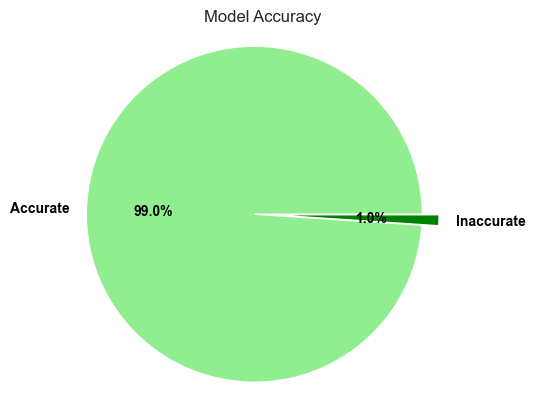

In [41]:
'''
Model Evaluation

Evaluate how accurate the model is.
'''
model_accuracy = trained_model.score(X_train_emails_embeddings, y_train_labels)
model_inaccuracy = 1.0 - model_accuracy

print(f'Model Accuracy: {model_accuracy}')

model_accuracy_percentages = [model_accuracy, model_inaccuracy]
model_accuracy_labels = ['Accurate', 'Inaccurate']

binary_percentage_pie_chart(model_accuracy_percentages, model_accuracy_labels, 'Model Accuracy')

In [42]:
'''
Making Predictions
'''

y_label_predictions = trained_model.predict(X_test_emails_embeddings)

Model Prediction Accuracy 0.9826842420611145


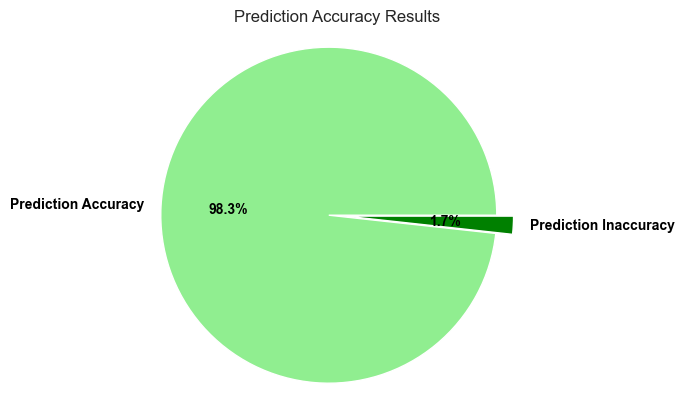

In [43]:
'''
Predictions Accuracy
'''

spam_prediction_accuracy = accuracy_score(y_test_labels, y_label_predictions)
spam_prediction_inaccuracy = 1.0 - spam_prediction_accuracy

print(f'Model Prediction Accuracy {spam_prediction_accuracy}')

spam_prediction_accuracy_percentages = [spam_prediction_accuracy, spam_prediction_inaccuracy]
spam_predictions_accuracy_labels = ['Prediction Accuracy', 'Prediction Inaccuracy']

binary_percentage_pie_chart(spam_prediction_accuracy_percentages, spam_predictions_accuracy_labels, 'Prediction Accuracy Results')

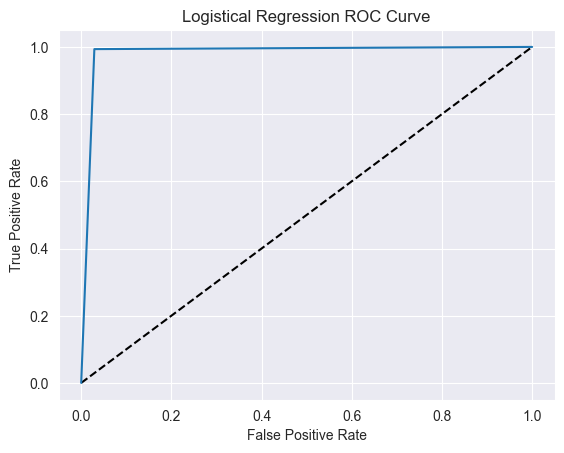

In [44]:
'''
Receiver Operator Characteristic (ROC) Curve & Score, Performance Assessment
'''

# Plotting ROC
false_positive_rate, true_positive_rate, _ = roc_curve(y_test_labels, y_label_predictions)
plt.plot([0,1], [0,1], 'k--')
plt.plot(false_positive_rate, true_positive_rate, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistical Regression ROC Curve')
plt.show()

In [45]:
'''
Area Under the Curve
'''
log_roc_auc_score = roc_auc_score(y_true=y_test_labels, y_score=y_label_predictions)
print(f'AUC (Area Under the Curve) Score: {log_roc_auc_score} ({round(log_roc_auc_score * 100, 2)})')

if log_roc_auc_score == .0:
    print('Fitted model predicts opposite classification.')
elif .0 < log_roc_auc_score < .5:
    print('Fitted model predicts no better than random guessing.')
elif .5 < log_roc_auc_score < .99:
    print('Fitted model predicts better than random guessing.')
else:
    print('Fitted model perfectly predicts classifications.')



AUC (Area Under the Curve) Score: 0.9821508589186757 (98.22)
Fitted model predicts better than random guessing.


In [46]:
'''
Predictions Classification Report
'''
spam_classification_report = classification_report(y_test_labels, y_label_predictions)

print(spam_classification_report)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      7952
           1       0.97      0.99      0.98      8738

    accuracy                           0.98     16690
   macro avg       0.98      0.98      0.98     16690
weighted avg       0.98      0.98      0.98     16690


In [47]:
'''
Predictions Mean Squared Error (MSE) | Root Mean Squared Error (RMSE) Results
'''

mse = mean_squared_error(y_test_labels, y_label_predictions)
rmse = math.sqrt(mse)

error_results_display = f'''
Total Test Values: {len(y_test_labels)}
Mean Squared Error (MSE): {mse} ({round(mse * 100, 2)} %)
   -Squared difference between the predicted value and the actual value
Root Mean Squared Error (RMSE): {rmse} ({round(rmse * 100 ,2)}%)
   -Average error per prediction
'''

print(error_results_display)


Total Test Values: 16690
Mean Squared Error (MSE): 0.01731575793888556 (1.73 %)
   -Squared difference between the predicted value and the actual value
Root Mean Squared Error (RMSE): 0.13158935344048758 (13.16%)
   -Average error per prediction


In [48]:
'''
Predictions Confusion Matrix
'''

spam_prediction_confusion_matrix = confusion_matrix(y_test_labels, y_label_predictions)

print(spam_prediction_confusion_matrix)

spcm_display = confusion_matrix_user_friendly(spam_prediction_confusion_matrix)

print(spcm_display)



[[7720  232]
 [  57 8681]]

    True-Negatives: 7720
    False-Positives: 232
    False-Negative: 57
    True-Positives: 8681
    


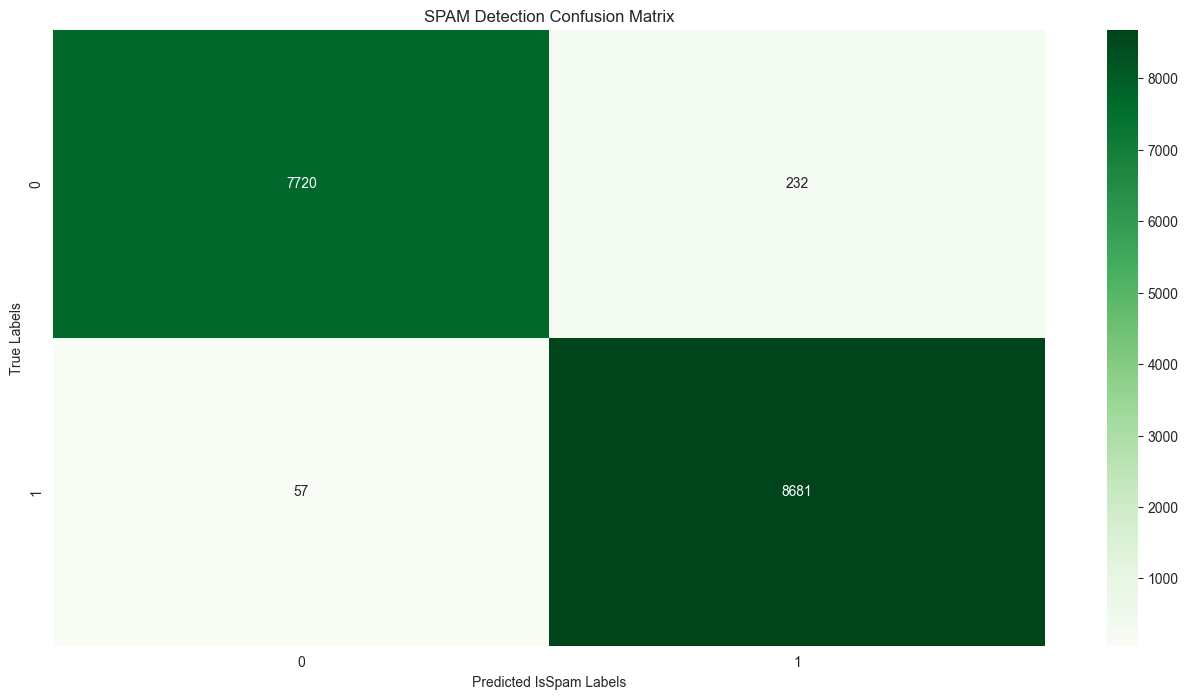

In [49]:
'''
Heat Map of Predictions Confusion Matrix
'''
plt.figure(figsize=(16,8))
sns.heatmap(spam_prediction_confusion_matrix, annot=True, fmt='g', cmap='Greens')
plt.xlabel('Predicted IsSpam Labels')
plt.ylabel('True Labels')
plt.title('SPAM Detection Confusion Matrix')

plt.show()

In [50]:
'''
Probability Estimates
'''

spam_probabilities = trained_model.predict_proba(X_test_emails_embeddings)

low_confidence_results = get_probabilities_by_threshold(spam_probabilities)

low_confidence_percentage = len(low_confidence_results) / len(spam_probabilities)
print(f'Percentage of Low-Probabilities using test email embeddings is {round(low_confidence_percentage * 100, 2)}%')

Percentage of Low-Probabilities using test email embeddings is 1.62%


In [51]:
'''
Low-Confidence Probabilities Collected
'''
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(low_confidence_results)

{   88: 'HAM(0): 0.4286285842008236 | SPAM(1): 0.5713714157991764',
    107: 'HAM(0): 0.5737335942310544 | SPAM(1): 0.42626640576894553',
    118: 'HAM(0): 0.5128623552023287 | SPAM(1): 0.4871376447976713',
    172: 'HAM(0): 0.42407133122441254 | SPAM(1): 0.5759286687755875',
    255: 'HAM(0): 0.42448482606722593 | SPAM(1): 0.5755151739327741',
    361: 'HAM(0): 0.4303811868641141 | SPAM(1): 0.5696188131358859',
    431: 'HAM(0): 0.5632771616240112 | SPAM(1): 0.4367228383759888',
    476: 'HAM(0): 0.5875574739560047 | SPAM(1): 0.41244252604399534',
    481: 'HAM(0): 0.47757835849960295 | SPAM(1): 0.522421641500397',
    505: 'HAM(0): 0.5798584481198239 | SPAM(1): 0.4201415518801761',
    578: 'HAM(0): 0.5370724570786474 | SPAM(1): 0.4629275429213526',
    587: 'HAM(0): 0.5307697444155721 | SPAM(1): 0.46923025558442794',
    622: 'HAM(0): 0.45587963717333435 | SPAM(1): 0.5441203628266656',
    747: 'HAM(0): 0.5548812415221356 | SPAM(1): 0.44511875847786436',
    783: 'HAM(0): 0.40039891

In [52]:
'''
Model Interpretation
'''
model_coefficients = trained_model.coef_
print(f'Total Coefficients: {len(model_coefficients[0])}')
print(model_coefficients)

#Data is too big for this. MemoryError now matter which solver I pick for LogisticRegression
#logit_constant = add_constant(X_train_emails_embeddings)
#logit_model = Logit(y_train_labels, logit_constant)
#fitted_logit_model = logit_model.fit()

#print(fitted_logit_model.summary())

Total Coefficients: 281315
[[-0.11389033 -1.91096235 -0.90721212 ...  0.06358261  0.02314254
  -0.07163677]]


<a id="data-summary-and-implications"></a>
# E: Data Summary and Implications
>Summarize the implications of your data analysis by discussing the results of your data analysis in the context of the research question, including one limitation of your analysis. Within the context of your research question, recommend a course of action based on your results. Then propose two directions or approaches for future study of the data set.

<a id="sources"></a>
# F: Sources
>Acknowledge sources, using in-text citations and references, for content that is quoted.

* PURU SINGHVI. (n.d.). Spam Email Classification Dataset Kaggle.
  Retrieved from https://www.kaggle.com/datasets/purusinghvi/email-spam-classification-dataset
  <br /><br />
  
* GitHub. (n.d.). About large files on GitHub. GitHub Docs. 
  Retrieved from https://docs.github.com/en/repositories/working-with-files/managing-large-files/about-large-files-on-github
  <br /><br />